<a href="https://colab.research.google.com/github/bijoy-420/ML_Projects/blob/main/metabolicsyndrome.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install catboost

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Metabolic_Syndrome.csv')

In [ ]:
df.head(10)

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,0
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,0
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,0
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,0
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,0
5,62178,80,Male,Widowed,300.0,White,112.5,28.5,0,9.79,4.8,105,47,100,0
6,62184,26,Male,Single,9000.0,Black,78.6,22.1,0,9.21,5.4,87,61,40,0
7,62189,30,Female,Married,6200.0,Asian,80.2,22.4,0,8.78,6.7,83,48,91,0
8,62191,70,Male,Divorced,1000.0,Black,NaN,NaN,1,45.67,5.4,96,35,75,0
9,62195,35,Male,NaN,2500.0,Black,99.0,28.2,0,2.21,6.7,94,46,86,0


In [ ]:
# pip install ydata-profiling


In [ ]:
# from ydata_profiling import ProfileReport
# profile = ProfileReport(
#     df,
#     title="Metabolic Syndrome Dataset Report",
#     explorative=True
# )
# profile

In [ ]:
df.shape

(2401, 15)

In [ ]:
df.isnull().sum()

,0
seqn,0
Age,0
Sex,0
Marital,208
Income,117
Race,0
WaistCirc,85
BMI,26
Albuminuria,0
UrAlbCr,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seqn               2401 non-null   int64  
 1   Age                2401 non-null   int64  
 2   Sex                2401 non-null   object 
 3   Marital            2193 non-null   object 
 4   Income             2284 non-null   float64
 5   Race               2401 non-null   object 
 6   WaistCirc          2316 non-null   float64
 7   BMI                2375 non-null   float64
 8   Albuminuria        2401 non-null   int64  
 9   UrAlbCr            2401 non-null   float64
 10  UricAcid           2401 non-null   float64
 11  BloodGlucose       2401 non-null   int64  
 12  HDL                2401 non-null   int64  
 13  Triglycerides      2401 non-null   int64  
 14  MetabolicSyndrome  2401 non-null   int64  
dtypes: float64(5), int64(7), object(3)
memory usage: 281.5+ KB


In [ ]:
# df=df.dropna()
df['Marital']=df['Marital'].fillna(df['Marital'].mode()[0])
df['Income']=df['Income'].fillna(df['Income'].mean())
df['WaistCirc']=df['WaistCirc'].fillna(df['WaistCirc'].mean())
df['BMI']=df['BMI'].fillna(df['BMI'].mean())

In [ ]:
df.isnull().sum()

,0
seqn,0
Age,0
Sex,0
Marital,0
Income,0
Race,0
WaistCirc,0
BMI,0
Albuminuria,0
UrAlbCr,0


In [ ]:
df.shape

(2401, 15)

In [ ]:
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['Marital']=le.fit_transform(df['Marital'])
df['Race']=le.fit_transform(df['Race'])

In [ ]:
X=df.drop('MetabolicSyndrome',axis=1)
y=df['MetabolicSyndrome']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

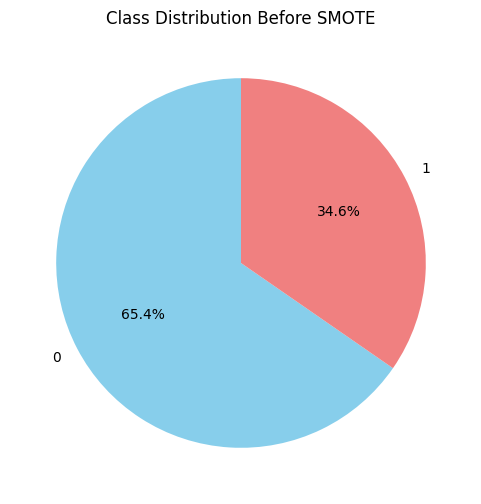

In [ ]:
plt.figure(figsize=(6, 6))
y_train.value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title("Class Distribution Before SMOTE")
plt.ylabel("")
plt.show()

In [ ]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
models={
    'SVC':SVC(),
    'KNN':KNeighborsClassifier(),
    'DecisionTree':DecisionTreeClassifier(),
    'RandomForest':RandomForestClassifier(),
    'XGBClassifier':XGBClassifier(eval_metric='mlogloss', use_label_encoder=False),
    'CatBoost':CatBoostClassifier()

}

In [ ]:
for i in models:
  models[i].fit(X_train,y_train)
  y_pred=models[i].predict(X_test)
  print(f'accuracy_score',i,accuracy_score(y_test,y_pred))



accuracy_score SVC 0.8232848232848233
accuracy_score KNN 0.7900207900207901
accuracy_score DecisionTree 0.8607068607068608
accuracy_score RandomForest 0.8731808731808732
accuracy_score XGBClassifier 0.8877338877338877
Learning rate set to 0.013611
0:	learn: 0.6795704	total: 4.21ms	remaining: 4.2s
1:	learn: 0.6659177	total: 6.86ms	remaining: 3.42s
2:	learn: 0.6533643	total: 9.65ms	remaining: 3.21s
3:	learn: 0.6408670	total: 12.3ms	remaining: 3.07s
4:	learn: 0.6296139	total: 14.8ms	remaining: 2.94s
5:	learn: 0.6173405	total: 17.3ms	remaining: 2.87s
6:	learn: 0.6041234	total: 19.8ms	remaining: 2.81s
7:	learn: 0.5929713	total: 22.4ms	remaining: 2.78s
8:	learn: 0.5822365	total: 25ms	remaining: 2.75s
9:	learn: 0.5706153	total: 27.5ms	remaining: 2.72s
10:	learn: 0.5584433	total: 29.9ms	remaining: 2.69s
11:	learn: 0.5497409	total: 32.5ms	remaining: 2.67s


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:17:30] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


12:	learn: 0.5410540	total: 36.7ms	remaining: 2.78s
13:	learn: 0.5303270	total: 40.4ms	remaining: 2.85s
14:	learn: 0.5185142	total: 43.1ms	remaining: 2.83s
15:	learn: 0.5096477	total: 45.8ms	remaining: 2.81s
16:	learn: 0.5008723	total: 48.4ms	remaining: 2.8s
17:	learn: 0.4954804	total: 50.8ms	remaining: 2.77s
18:	learn: 0.4854277	total: 53.4ms	remaining: 2.76s
19:	learn: 0.4781157	total: 61.3ms	remaining: 3s
20:	learn: 0.4717939	total: 63.9ms	remaining: 2.98s
21:	learn: 0.4650792	total: 66.4ms	remaining: 2.95s
22:	learn: 0.4559125	total: 69.1ms	remaining: 2.93s
23:	learn: 0.4496117	total: 72ms	remaining: 2.93s
24:	learn: 0.4426341	total: 74.7ms	remaining: 2.91s
25:	learn: 0.4373664	total: 77.3ms	remaining: 2.9s
26:	learn: 0.4307317	total: 80ms	remaining: 2.88s
27:	learn: 0.4251082	total: 82.6ms	remaining: 2.87s
28:	learn: 0.4183009	total: 85.1ms	remaining: 2.85s
29:	learn: 0.4118033	total: 88.6ms	remaining: 2.86s
30:	learn: 0.4078755	total: 92.2ms	remaining: 2.88s
31:	learn: 0.4016491	

In [ ]:
#5 fold cross validastion
from sklearn.model_selection import KFold,cross_val_score
kf=KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=kf)
    print(name, "Accuracy:", scores.mean())

SVC Accuracy: 0.6576360013860013
KNN Accuracy: 0.6497392584892585
DecisionTree Accuracy: 0.8621361746361746
RandomForest Accuracy: 0.8792203742203742


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [07:49:02] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [07:49:03] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [07:49:04] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [07:49:05] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [07:49:06] WARNING: /w

Streaming output truncated to the last 5000 lines.
5:	learn: 0.6139868	total: 46.5ms	remaining: 7.71s
6:	learn: 0.6016480	total: 55ms	remaining: 7.8s
7:	learn: 0.5901944	total: 57.6ms	remaining: 7.14s
8:	learn: 0.5794541	total: 65.6ms	remaining: 7.22s
9:	learn: 0.5689481	total: 75.3ms	remaining: 7.45s
10:	learn: 0.5568300	total: 85.2ms	remaining: 7.66s
11:	learn: 0.5468351	total: 88.6ms	remaining: 7.29s
12:	learn: 0.5378756	total: 92ms	remaining: 6.98s
13:	learn: 0.5272703	total: 95.4ms	remaining: 6.72s
14:	learn: 0.5176898	total: 113ms	remaining: 7.41s
15:	learn: 0.5097702	total: 117ms	remaining: 7.17s
16:	learn: 0.5009946	total: 125ms	remaining: 7.25s
17:	learn: 0.4955765	total: 135ms	remaining: 7.35s
18:	learn: 0.4867747	total: 146ms	remaining: 7.54s
19:	learn: 0.4808605	total: 154ms	remaining: 7.57s
20:	learn: 0.4744820	total: 162ms	remaining: 7.57s
21:	learn: 0.4655451	total: 171ms	remaining: 7.6s
22:	learn: 0.4563561	total: 179ms	remaining: 7.6s
23:	learn: 0.4500721	total: 188ms	

In [ ]:
param_grids = {
    'SVC': {
        'C': [0.1, 1, 10, 50],
        'kernel': ['rbf', 'linear'],
        'gamma': ['scale', 'auto']
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },


    'DecisionTree': {
        'max_depth': [3, 5, 10, None],
        'criterion': ['gini', 'entropy'],
        'min_samples_split': [2, 5, 10]
    },

    'RandomForest': {
        'n_estimators': [200, 300, 500],
        'max_depth': [5, 10, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },

    'XGBClassifier': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 1.0]
    },


    'CatBoost': {
        'iterations': [200, 500, 800],
        'learning_rate': [0.01, 0.05, 0.1],
        'depth': [4, 6, 8]
    }




}


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# model={
#     'SVC':SVC(),
#     'DecisionTree':DecisionTreeClassifier(),
#     'RandomForest':RandomForestClassifier(),
#     'XGBClassifier':XGBClassifier(),
#     'KNN':KNeighborsClassifier(),
#     'CatBoost':CatBoostClassifier()

# }
# best_models = {}
# best_scores = {}

# for name, model_obj in model.items():
#     print(f"\n Tuning {name} ...")

#     search = RandomizedSearchCV(
#         estimator=model_obj,
#         param_distributions=param_grids[name],
#         n_iter=20,
#         cv=5,
#         scoring='accuracy',
#         n_jobs=-1,
#         verbose=1
#     )

#     search.fit(X_train, y_train)

#     best_models[name] = search.best_estimator_
#     best_scores[name] = search.best_score_

#     print(f" Best Score ({name}): {search.best_score_}")
#     print(f" Best Params: {search.best_params_}")


In [ ]:
from sklearn.model_selection import GridSearchCV


best_models = {}
best_scores = {}

for name, model_obj in models.items():
    print(f"\n Tuning {name} with GridSearchCV ...")

    grid = GridSearchCV(
        estimator=model_obj,
        param_grid=param_grids[name],
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        verbose=2
    )

    grid.fit(X_train, y_train)

    best_models[name] = grid.best_estimator_
    best_scores[name] = grid.best_score_

    print(f" Best Score ({name}): {grid.best_score_}")
    print(f" Best Params: {grid.best_params_}")



 Tuning SVC with GridSearchCV ...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
 Best Score (SVC): 0.8515625
 Best Params: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}

 Tuning KNN with GridSearchCV ...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
 Best Score (KNN): 0.8192708333333334
 Best Params: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}

 Tuning DecisionTree with GridSearchCV ...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
 Best Score (DecisionTree): 0.8614583333333334
 Best Params: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}

 Tuning RandomForest with GridSearchCV ...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
 Best Score (RandomForest): 0.88125
 Best Params: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}

 Tuning XGBClassifier with GridSearchCV ...
Fitting 5 folds for each of 54 candidates, totalling 270 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [07:54:40] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


 Best Score (XGBClassifier): 0.8911458333333334
 Best Params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}

 Tuning CatBoost with GridSearchCV ...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
0:	learn: 0.6831373	total: 6.16ms	remaining: 3.07s
1:	learn: 0.6729729	total: 9.44ms	remaining: 2.35s
2:	learn: 0.6635351	total: 12ms	remaining: 1.98s
3:	learn: 0.6540479	total: 14.5ms	remaining: 1.8s
4:	learn: 0.6454213	total: 17ms	remaining: 1.69s
5:	learn: 0.6359227	total: 19.5ms	remaining: 1.61s
6:	learn: 0.6256457	total: 22ms	remaining: 1.55s
7:	learn: 0.6168391	total: 24.5ms	remaining: 1.51s
8:	learn: 0.6082856	total: 27.1ms	remaining: 1.48s
9:	learn: 0.5989683	total: 29.5ms	remaining: 1.45s
10:	learn: 0.5890967	total: 31.9ms	remaining: 1.42s
11:	learn: 0.5819127	total: 34.3ms	remaining: 1.4s
12:	learn: 0.5746487	total: 36.7ms	remaining: 1.38s
13:	learn: 0.5660312	total: 39.4ms	remaining: 1.37s
14:	learn: 0.5578668	total: 42ms	remaining: 1.3

In [ ]:

from IPython.display import display


rows = []

for name in best_models.keys():
    rows.append({
        "Model": name,
        "Best CV Score": best_scores[name],

    })


df_results = pd.DataFrame(rows)

df_results = df_results.sort_values(by="Best CV Score", ascending=False)


display(df_results)

print("\n GridSearchCV Result Table")
print(df_results.to_string(index=False))


,Model,Best CV Score
5,CatBoost,0.893229
4,XGBClassifier,0.891146
3,RandomForest,0.881250
2,DecisionTree,0.861458
0,SVC,0.851562
1,KNN,0.819271



 GridSearchCV Result Table
        Model  Best CV Score
     CatBoost       0.893229
XGBClassifier       0.891146
 RandomForest       0.881250
 DecisionTree       0.861458
          SVC       0.851562
          KNN       0.819271


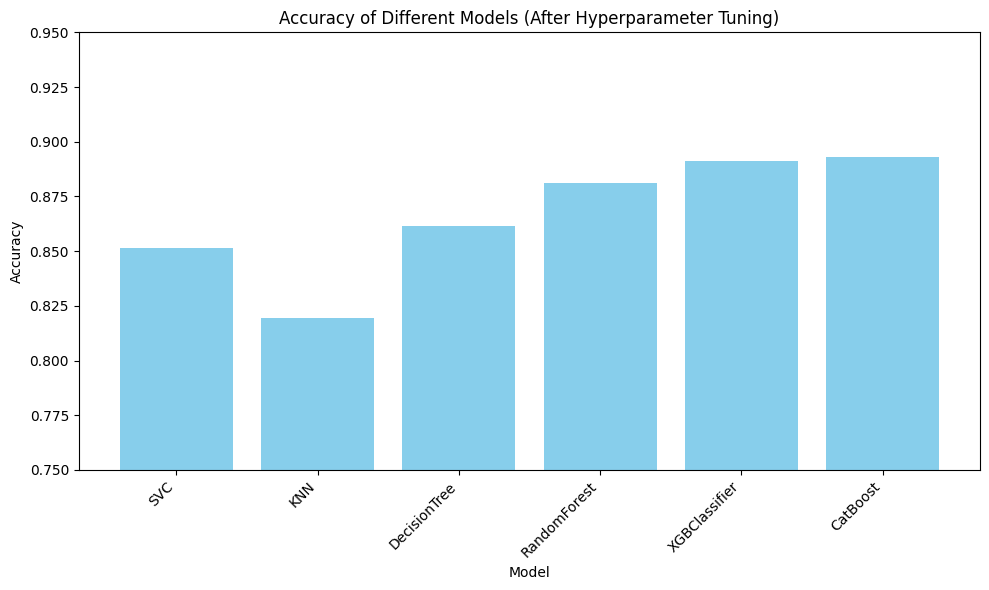

In [ ]:
plt.figure(figsize=(10, 6))
model_names = list(best_scores.keys())
accuracy_scores = list(best_scores.values())
plt.bar(model_names, accuracy_scores, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models (After Hyperparameter Tuning)')
plt.ylim(0.75, 0.95)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [ ]:
import pickle
import os

os.makedirs("saved_models", exist_ok=True)

for name, model in best_models.items():
    filename = f"saved_models/{name}_best_model.pkl"
    with open(filename, "wb") as f:
        pickle.dump(model, f)
    print(f"Saved: {filename}")


Saved: saved_models/SVC_best_model.pkl
Saved: saved_models/KNN_best_model.pkl
Saved: saved_models/DecisionTree_best_model.pkl
Saved: saved_models/RandomForest_best_model.pkl
Saved: saved_models/XGBClassifier_best_model.pkl
Saved: saved_models/CatBoost_best_model.pkl


In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import models

In [ ]:
X_train_cnn = X_train.reshape(-1, X_train.shape[1], 1)
X_test_cnn  = X_test.reshape(-1, X_test.shape[1], 1)

num_features = X_train.shape[1]
num_classes = len(np.unique(y))


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

cnn = models.Sequential([
    layers.Conv1D(64, 3, activation='relu', input_shape=(num_features, 1)),
    layers.MaxPooling1D(2),

    layers.Conv1D(128, 3, activation='relu'),
    layers.MaxPooling1D(2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),

    layers.Dense(num_classes, activation='softmax')
])

cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

cnn.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 12, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 6, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 4, 128)         │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 2, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,114 (227.01 KB)

 Trainable params: 58,114 (227.01 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = cnn.fit(
    X_train_cnn, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    shuffle=True
)


Epoch 1/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.6780 - loss: 0.5662 - val_accuracy: 0.7578 - val_loss: 0.4737
Epoch 2/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.7829 - loss: 0.4663 - val_accuracy: 0.7865 - val_loss: 0.4215
Epoch 3/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8188 - loss: 0.4116 - val_accuracy: 0.7526 - val_loss: 0.4625
Epoch 4/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7888 - loss: 0.4166 - val_accuracy: 0.8099 - val_loss: 0.3881
Epoch 5/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8370 - loss: 0.3585 - val_accuracy: 0.8177 - val_loss: 0.3853
Epoch 6/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8369 - loss: 0.3486 - val_accuracy: 0.8125 - val_loss: 0.3783
Epoch 7/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8561 - loss: 0.3322 - val_accuracy: 0.8333 - val_loss: 0.3615
Epoch 8/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8575 - loss: 0.3190 - val_accuracy: 0.8281 - v

In [ ]:
test_loss, test_acc = cnn.evaluate(X_test_cnn, y_test)
print("CNN Test Accuracy:", test_acc)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8738 - loss: 0.3619  
CNN Test Accuracy: 0.8440748453140259


In [ ]:
pip install shap


Generating SHAP Summary Plot...


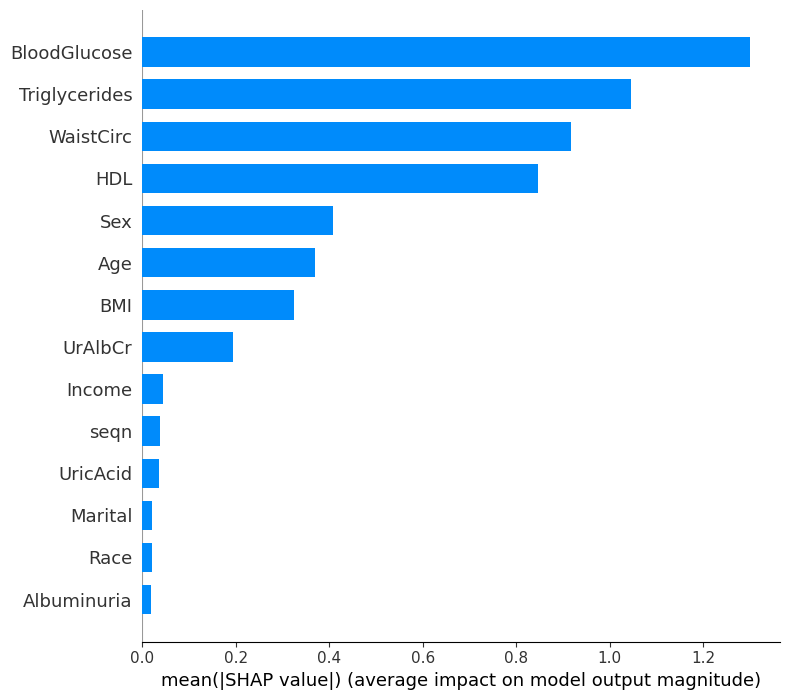

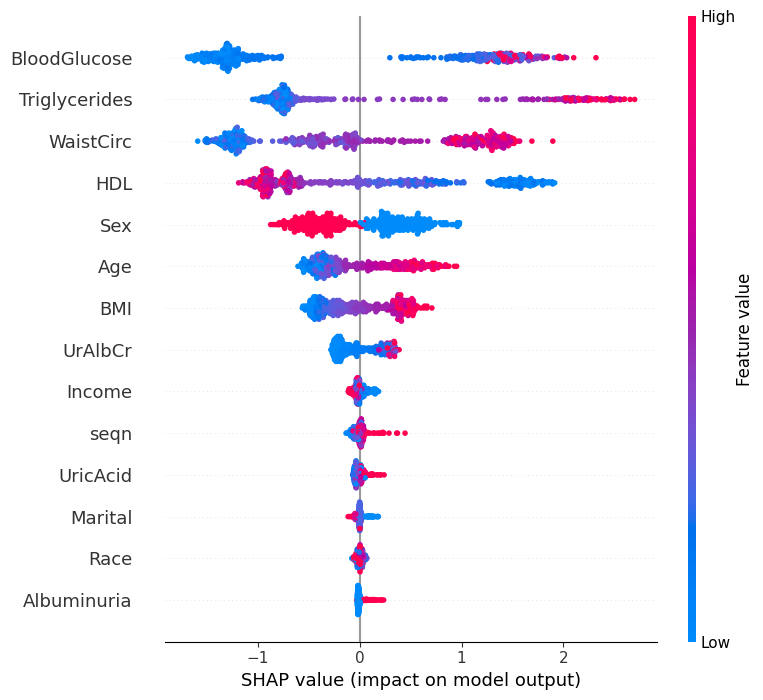


Generating SHAP Force Plot for a single prediction...


In [ ]:
import shap
from google.colab import files

best_catboost_model = best_models['CatBoost']

explainer = shap.TreeExplainer(best_catboost_model)

shap_values = explainer.shap_values(X_test)

#  SHAP Summary Plot (Global Feature Importance)
print('Generating SHAP Summary Plot...')
shap.summary_plot(shap_values, X_test, feature_names=X.columns, plot_type='bar')
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# SHAP Force Plot (for a single prediction)
print('\nGenerating SHAP Force Plot for a single prediction...')

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test[0,:], feature_names=X.columns)



[('Triglycerides > 0.22', 0.38502819542277794), ('HDL <= -0.70', 0.2137769655764142), ('-0.23 < BloodGlucose <= 0.07', 0.18724221221857387), ('-0.99 < Sex <= 1.01', -0.14769754532575297), ('-0.06 < WaistCirc <= 0.56', 0.08027084595132235), ('Age <= -0.86', -0.04869590137796518), ('UrAlbCr <= -0.15', -0.02885791388164524), ('-0.14 < BMI <= 0.50', 0.017288668876602905), ('0.10 < Race <= 1.11', -0.014285116979162092), ('Albuminuria <= -0.37', -0.008827462485393619)]


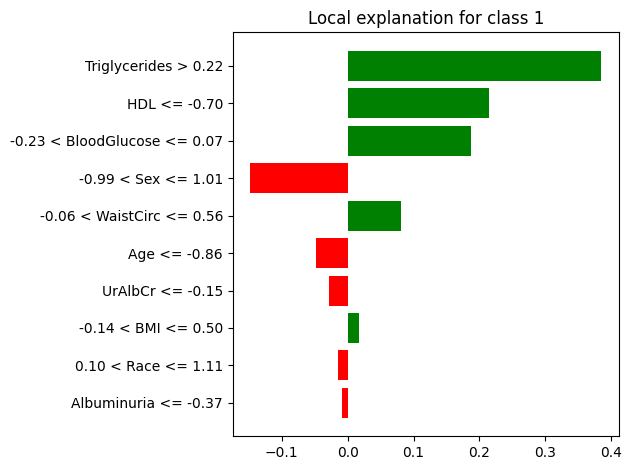

In [ ]:
!pip install lime --quiet

import numpy as np
import pandas as pd
from lime.lime_tabular import LimeTabularExplainer
from IPython.display import display, HTML
import matplotlib.pyplot as plt


feature_names = X.columns.tolist()


class_names = list(map(str, np.unique(y_train)))

# Create LIME explainer
explainer_lime = LimeTabularExplainer(
    training_data = X_train,
    feature_names = feature_names,
    class_names = class_names,
    mode = 'classification',
    discretize_continuous = True
)


i = 0
instance = X_test[i]

predict_fn = lambda x: best_catboost_model.predict_proba(x)

exp = explainer_lime.explain_instance(
    data_row = instance,
    predict_fn = predict_fn,
    num_features = 10
)

print(exp.as_list())

display(HTML(exp.as_html()))

fig = exp.as_pyplot_figure()
plt.tight_layout()
plt.show()


# **After Class Balanching**

In [ ]:
!pip install imbalanced-learn


In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)

print("Before:", y_train.value_counts())
print("After:", pd.Series(y_train_bal).value_counts())


Before: MetabolicSyndrome
0    1255
1     665
Name: count, dtype: int64
After: MetabolicSyndrome
0    1255
1    1255
Name: count, dtype: int64


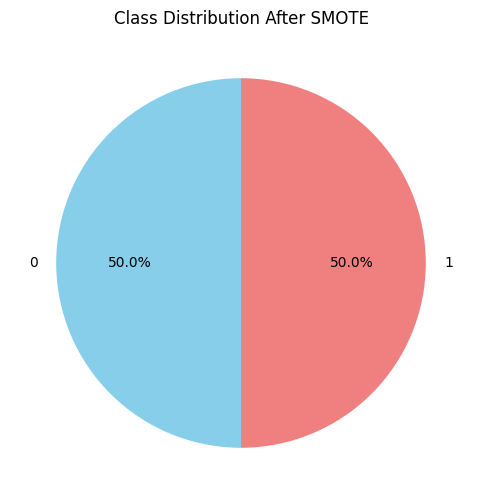

In [ ]:
plt.figure(figsize=(6, 6))
y_train_bal.value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title("Class Distribution After SMOTE")
plt.ylabel("")
plt.show()

In [ ]:
for i in models:
  models[i].fit(X_train_bal,y_train_bal)
  y_pred=models[i].predict(X_test)
  print(f'accuracy_score',i,accuracy_score(y_test,y_pred))



accuracy_score SVC 0.8316008316008316
accuracy_score KNN 0.7713097713097713
accuracy_score DecisionTree 0.841995841995842
accuracy_score RandomForest 0.8731808731808732
accuracy_score XGBClassifier 0.8835758835758836
Learning rate set to 0.015261


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:17:58] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


0:	learn: 0.6745437	total: 7.37ms	remaining: 7.37s
1:	learn: 0.6570018	total: 12.9ms	remaining: 6.43s
2:	learn: 0.6415714	total: 19.2ms	remaining: 6.37s
3:	learn: 0.6284516	total: 24.2ms	remaining: 6.02s
4:	learn: 0.6100555	total: 28.4ms	remaining: 5.66s
5:	learn: 0.5989240	total: 32.5ms	remaining: 5.39s
6:	learn: 0.5818965	total: 36.7ms	remaining: 5.2s
7:	learn: 0.5688828	total: 40.9ms	remaining: 5.07s
8:	learn: 0.5543111	total: 45ms	remaining: 4.96s
9:	learn: 0.5423642	total: 49.2ms	remaining: 4.87s
10:	learn: 0.5309639	total: 53.7ms	remaining: 4.83s
11:	learn: 0.5216493	total: 58ms	remaining: 4.77s
12:	learn: 0.5105509	total: 62.2ms	remaining: 4.72s
13:	learn: 0.5021508	total: 66.7ms	remaining: 4.7s
14:	learn: 0.4929141	total: 71ms	remaining: 4.66s
15:	learn: 0.4827345	total: 75.1ms	remaining: 4.62s
16:	learn: 0.4743075	total: 79.1ms	remaining: 4.57s
17:	learn: 0.4663497	total: 83.1ms	remaining: 4.54s
18:	learn: 0.4598096	total: 88.4ms	remaining: 4.56s
19:	learn: 0.4497467	total: 92

In [ ]:
from sklearn.model_selection import GridSearchCV



best_models = {}
best_scores = {}

for name, model_obj in models.items():
    print(f"\n Tuning {name} with GridSearchCV ...")

    grid = GridSearchCV(
        estimator=model_obj,
        param_grid=param_grids[name],
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        verbose=2
    )

    grid.fit(X_train_bal, y_train_bal)

    best_models[name] = grid.best_estimator_
    best_scores[name] = grid.best_score_

    print(f" Best Score ({name}): {grid.best_score_}")
    print(f" Best Params: {grid.best_params_}")



 Tuning SVC with GridSearchCV ...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
 Best Score (SVC): 0.8756972111553785
 Best Params: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}

 Tuning KNN with GridSearchCV ...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
 Best Score (KNN): 0.8685258964143425
 Best Params: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}

 Tuning DecisionTree with GridSearchCV ...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
 Best Score (DecisionTree): 0.8800796812749004
 Best Params: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}

 Tuning RandomForest with GridSearchCV ...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
 Best Score (RandomForest): 0.9071713147410359
 Best Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}

 Tuning XGBClassifier with GridSearchCV ...
Fitting 5 folds for each of 54 candidates, totalling 270 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:24:33] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


 Best Score (XGBClassifier): 0.9127490039840638
 Best Params: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}

 Tuning CatBoost with GridSearchCV ...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
0:	learn: 0.5863116	total: 39.1ms	remaining: 19.5s
1:	learn: 0.4913371	total: 64.7ms	remaining: 16.1s
2:	learn: 0.4209634	total: 88.1ms	remaining: 14.6s
3:	learn: 0.3749638	total: 113ms	remaining: 14.1s
4:	learn: 0.3373151	total: 136ms	remaining: 13.4s
5:	learn: 0.3114004	total: 156ms	remaining: 12.9s
6:	learn: 0.2909851	total: 178ms	remaining: 12.5s
7:	learn: 0.2715458	total: 199ms	remaining: 12.2s
8:	learn: 0.2523562	total: 226ms	remaining: 12.3s
9:	learn: 0.2400976	total: 264ms	remaining: 12.9s
10:	learn: 0.2292074	total: 292ms	remaining: 13s
11:	learn: 0.2203699	total: 313ms	remaining: 12.7s
12:	learn: 0.2114035	total: 340ms	remaining: 12.7s
13:	learn: 0.2040567	total: 362ms	remaining: 12.6s
14:	learn: 0.1981297	total: 387ms	remaining: 12.5s
1

In [ ]:

from IPython.display import display


rows = []

for name in best_models.keys():
    rows.append({
        "Model": name,
        "Best CV Score": best_scores[name],

    })


df_results = pd.DataFrame(rows)


df_results = df_results.sort_values(by="Best CV Score", ascending=False)


display(df_results)

# Also print clean text format
print("\nGridSearchCV Result Table ")
print(df_results.to_string(index=False))


,Model,Best CV Score
5,CatBoost,0.918327
4,XGBClassifier,0.912749
3,RandomForest,0.907171
2,DecisionTree,0.880080
0,SVC,0.875697
1,KNN,0.868526



GridSearchCV Result Table 
        Model  Best CV Score
     CatBoost       0.918327
XGBClassifier       0.912749
 RandomForest       0.907171
 DecisionTree       0.880080
          SVC       0.875697
          KNN       0.868526
